In [1]:
import numpy as np
from imageio import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage import filters
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging

logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)

In [16]:
File_data = np.loadtxt("im5.txt", dtype=int) 
print(File_data) 

[[ 38  52  38 ...  98  97  98]
 [  6  52  38 ...  82   0  82]
 [198  51 231 ...  65 167  81]
 ...
 [224  82  71 ... 197 151 197]
 [226  66 103 ... 197 151 197]
 [ 96  66  38 ... 197 151 197]]


In [3]:
with open("im4.txt", 'r') as fp:
    hex_list = ["{:02x}".format(ord(c)) for c in fp.read()]

In [7]:
File_data.shape

(143, 352)

In [4]:
np.size(File_data,0)

126

In [9]:
im1 = np.zeros((176,126,3))
for i in range(176):
  for j in range(126): 
    for k in range(3):
        if k == 1:
            im1[i,j,k] = File_data[j,i*3+1]/63
        elif k == 2:
            im1[i,j,k] = File_data[j,i*3]/31
        else:
            im1[i,j,k] = File_data[j,i*3+2]/31

In [46]:
im_raw = File_data.flatten()
im_raw

array([ 38,  52,  38, ..., 197, 151, 197])

In [55]:
im7 = np.zeros((143,176,3))

for i in range(143):
  for j in range(176): 
    s =im_raw[i*176*2+j*2]*256 + im_raw[i*176*2+j*2+1]
    # print(s)
    r = (s & 0xF800) >> 8
    g = (s & 0x7E0 ) >> 3
    b = (s & 0x1F) << 3
    for k in range(3):
        
        if k == 1:
            im7[i,j,k] = r
        elif k == 2:
            im7[i,j,k] = g
        else:
            im7[i,j,k] = b



In [34]:
im5 = np.zeros((176,143,3))
gray = np.zeros((176,143))
for i in range(176):
  for j in range(143): 
    s = File_data[j,i*2]*256 + File_data[j,i*2+1]
    # print(s)
    r = (s & 0xF800) >> 8
    g = (s & 0x7E0 ) >> 3
    b = (s & 0x1F) << 3
    for k in range(3):
        
        if k == 1:
            im5[i,j,k] = r/255
        elif k == 2:
            im5[i,j,k] = g/255
        else:
            im5[i,j,k] = b/255
    gray[i,j] = r*0.2989+g*0.5870+b*0.1140


In [41]:
im5

array([[[0.62745098, 0.1254902 , 0.76862745],
        [0.62745098, 0.        , 0.76862745],
        [0.59607843, 0.75294118, 0.76862745],
        ...,
        [0.56470588, 0.87843137, 0.03137255],
        [0.0627451 , 0.87843137, 0.28235294],
        [0.0627451 , 0.37647059, 0.03137255]],

       [[0.62745098, 0.1254902 , 0.76862745],
        [0.62745098, 0.1254902 , 0.76862745],
        [0.59607843, 0.87843137, 0.89411765],
        ...,
        [0.0627451 , 0.25098039, 0.90980392],
        [0.0627451 , 0.37647059, 0.90980392],
        [0.0627451 , 0.1254902 , 0.78431373]],

       [[0.62745098, 0.1254902 , 0.76862745],
        [0.62745098, 0.1254902 , 0.76862745],
        [0.62745098, 0.        , 0.64313725],
        ...,
        [0.56470588, 0.        , 0.01568627],
        [0.56470588, 0.1254902 , 0.01568627],
        [0.56470588, 0.        , 0.89411765]],

       ...,

       [[0.0627451 , 0.62745098, 0.17254902],
        [0.03137255, 0.87843137, 0.90980392],
        [0.03137255, 0

In [42]:
im6 = np.resize(im5,(143,176,3))

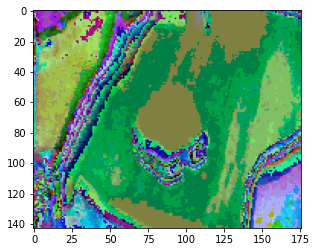

In [57]:
plt.imshow(im7/255)

In [12]:
from PIL import Image,ImageDraw
import os
 
 
#定义图像大小
w = 176     #宽
h = 120     #高
 
FileAdd = os.getcwd() + "\\im4.txt"#源文件路径
 
OutFile = os.getcwd() + "\\out.jpeg"#输出文件名称
 
 
f = open(FileAdd,encoding = "utf-8")#打开文件
print("正在合成来自" + FileAdd + "的图像数据，合成为" + str(w) + "*" + str(h) + "的图像")
 
Hex_To_Dec = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,'B':11,'C':12,'D':13,'E':14,'F':15}
 
z = 0
RGB = []
for x in range(w * h * 60):#将文本型十六进制，转为数值型十六进制
    f.seek(z+0,0)
    f1 = f.read(1)
    f.seek(z+1,0)
    f2 = f.read(1)
    f.seek(z+3,0)
    f3 = f.read(1)
    f.seek(z+4,0)
    f4 = f.read(1)
    z = z + 6
    
    s = (Hex_To_Dec[f1] << 12) + (Hex_To_Dec[f2] << 8) + (Hex_To_Dec[f3] << 4) + Hex_To_Dec[f4]
    
    #将RGB565转为RGB888
    r = (s & 0xF800) >> 8
    g = (s & 0x7E0 ) >> 3
    b = (s & 0x1F) << 3
    RGB.append((r, g, b))
    
    if z >= (w * h * 6):
        break
    
f.close()#关闭文件
image = Image.new('RGB', (w, h), (255, 255, 255))#创建新图片对象
draw = ImageDraw.Draw(image)# 创建Draw对象用于绘制新图:
i= 0
for y in range(h):# 填充每个像素并对对应像素填上RGB值:
    for x in range(w):
        draw.point((x, y), fill=RGB[i])
        i = i + 1
        
正在合成来自C:\Users\27475\wustl\ese498\im4.txt的图像数据，合成为176*120的图像
image.save(OutFile, 'jpeg')#保存文件
image.show()#查看图像

正在合成来自C:\Users\27475\wustl\ese498\im4.txt的图像数据，合成为176*120的图像


KeyError: ' '